In [114]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [115]:
clean_filenames_list = []

for filename in os.listdir('/Users/owainpill/Documents/GitHub/SiotDataAnalysis/imageprocessing/processedimages'):
    if filename.endswith(".jpg"):
        # print(filename)
        # print(filename.split('size'))
        name_wo_size = filename.split('size')
        name_wo_jpg = name_wo_size[1].split('.jpg')
        name_cleaned = [name_wo_size[0], name_wo_jpg[0][0:10], datetime.datetime.fromtimestamp(int(name_wo_jpg[0][0:10])).strftime('%Y-%m-%d %H:%M:%S')]## taking only first ten characters as this is epoch time in seconds
        # print(name_cleaned)
        clean_filenames_list.append(name_cleaned)

for filename in os.listdir('/Users/owainpill/Documents/GitHub/SiotDataAnalysis/imageprocessing/processedimagesexp3'):
    if filename.endswith(".jpg"):
        # print(filename)
        # print(filename.split('size'))
        name_wo_size = filename.split('size')
        name_wo_jpg = name_wo_size[1].split('.jpg')
        name_cleaned = [name_wo_size[0], name_wo_jpg[0][0:10], datetime.datetime.fromtimestamp(int(name_wo_jpg[0][0:10])).strftime('%Y-%m-%d %H:%M:%S')]## taking only first ten characters as this is epoch time in seconds
        # print(name_cleaned)
        clean_filenames_list.append(name_cleaned)

for filename in os.listdir('/Users/owainpill/Documents/GitHub/SiotDataAnalysis/imageprocessing/processedimagesexp4'):
    if filename.endswith(".jpg"):
        # print(filename)
        # print(filename.split('size'))
        name_wo_size = filename.split('size')
        name_wo_jpg = name_wo_size[1].split('.jpg')
        name_cleaned = [name_wo_size[0], name_wo_jpg[0][0:10], datetime.datetime.fromtimestamp(int(name_wo_jpg[0][0:10])).strftime('%Y-%m-%d %H:%M:%S')]## taking only first ten characters as this is epoch time in seconds
        # print(name_cleaned)
        clean_filenames_list.append(name_cleaned)


df = pd.DataFrame(clean_filenames_list, columns=['ycoord', 'epochtime', 'datetime'])
df['ycoord'] = df['ycoord'].astype(int)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by=['datetime'])
df = df.reset_index(drop=True)
# print(df)

df

,ycoord,epochtime,datetime
0,241,1701727943,2023-12-04 22:12:23
1,2108,1701727956,2023-12-04 22:12:36
2,1683,1701727962,2023-12-04 22:12:42
3,1380,1701727968,2023-12-04 22:12:48
4,1166,1701727974,2023-12-04 22:12:54
...,...,...,...
803,2186,1701903288,2023-12-06 22:54:48
804,2169,1701903294,2023-12-06 22:54:54
805,2167,1701903300,2023-12-06 22:55:00
806,2178,1701903306,2023-12-06 22:55:06


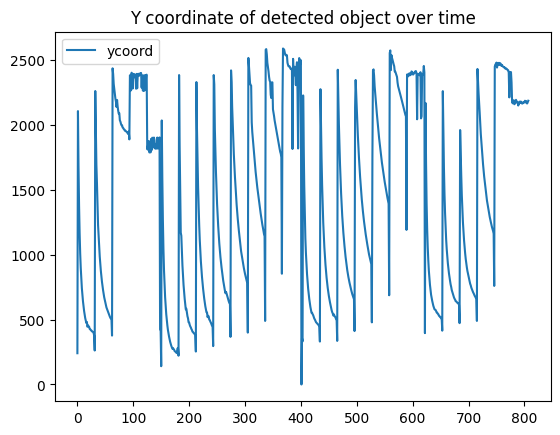

In [116]:
graph = df.plot(y='ycoord', kind='line', title='Y coordinate of detected object over time')#plot position without taking time into account

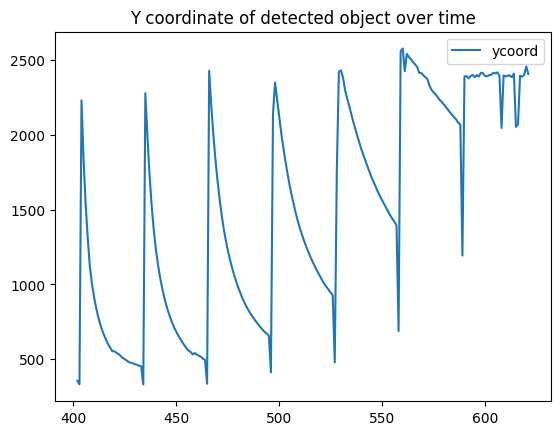

In [117]:
## Keep only the data for the test done at around 15C - "room" temperature in winter
# mask = (df['datetime'] > '2023-12-4') & (df['datetime'] <= '2023-12-6')
mask = (df['datetime'] > '2023-12-06 10:00:01') & (df['datetime'] <= '2023-12-06 12:59:59')
df = df.loc[mask]
graph = df.plot(y='ycoord', kind='line', title='Y coordinate of detected object over time')#plot position without taking time into account

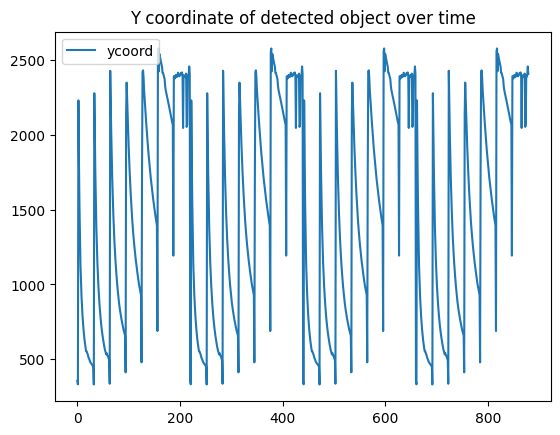

In [118]:
### Duplicate the data to simulate multiple experiments - in future this will be done by running the experiment multiple times

df = pd.concat([df]*4, ignore_index=True)
graph = df.plot(y='ycoord', kind='line', title='Y coordinate of detected object over time')#plot position without taking time into account

<BarContainer object of 250 artists>

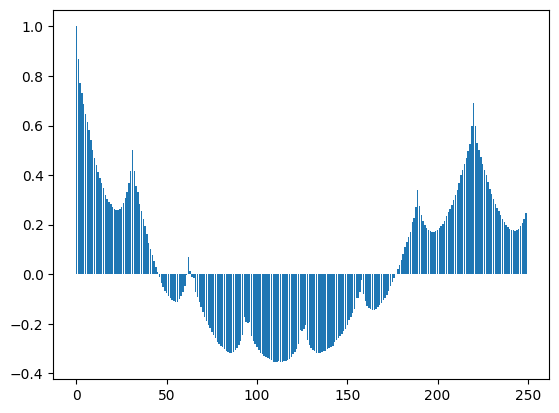

In [119]:
### data has no trend ie I term 
### data is seasonal - each experiment has a trend that can be described by a logisitic function

training_data = df['ycoord'][0:700]

acf_vals = acf(training_data, nlags=250)
# print(acf_vals)
num_lags = 250
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 250 artists>

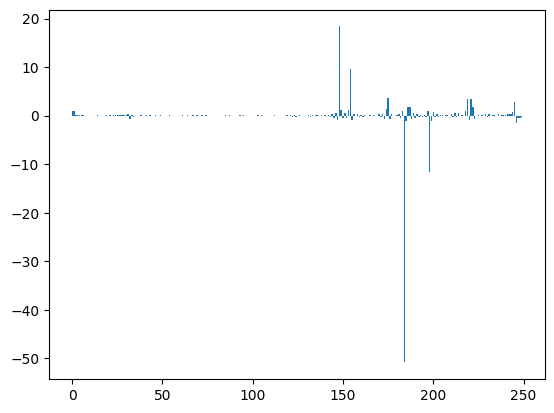

In [120]:
pacf_vals = pacf(training_data, nlags=250)
num_lags = 250
plt.bar(range(num_lags), pacf_vals[:num_lags])